        Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754
        Datum  Warengruppe      Umsatz        Day
0  2013-07-01            1  148.828353     Monday
1  2013-07-02            1  159.793757    Tuesday
2  2013-07-03            1  111.885594  Wednesday
3  2013-07-04            1  168.864941   Thursday
4  2013-07-05            1  171.280754     Friday


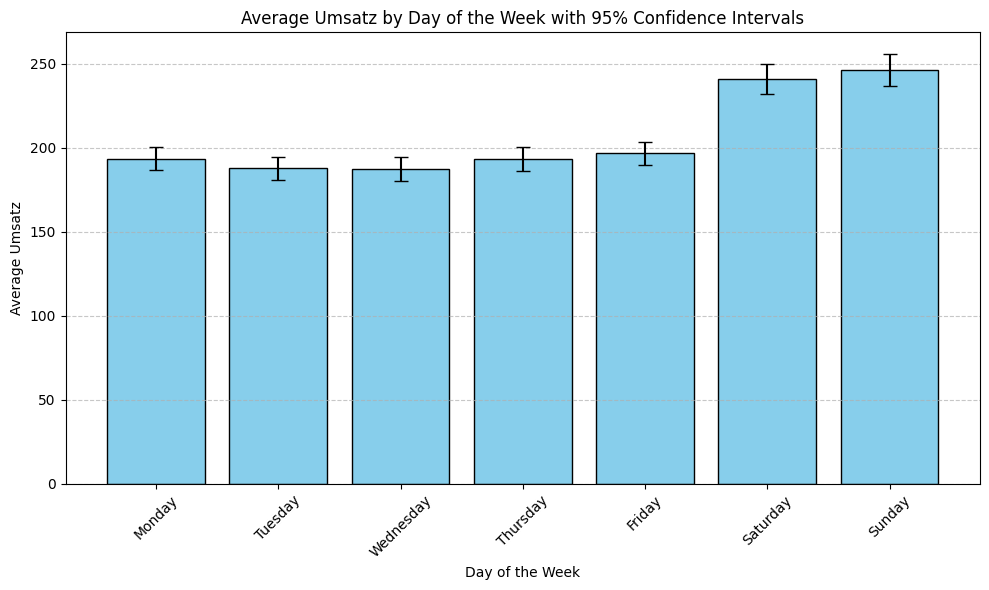

In [2]:
import pandas as pd

df = pd.read_csv('umsatzdaten_gekuerzt.csv')

print(df.head())

df['Day'] = pd.to_datetime(df['Datum']).dt.strftime('%A')

print(df.head())

mean_values = df.groupby('Day')['Umsatz'].mean().reset_index()
sem = df.groupby('Day')['Umsatz'].sem()
mean_values['SEM'] = sem.values

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

import matplotlib.pyplot as plt

# Reorder the mean_values DataFrame according to day_order
mean_values['Day'] = pd.Categorical(mean_values['Day'], categories=day_order, ordered=True)
mean_values = mean_values.sort_values('Day')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(mean_values['Day'], mean_values['Umsatz'], capsize=5, color='skyblue', edgecolor='black')
plt.errorbar(mean_values['Day'], mean_values['Umsatz'], yerr=1.96 * mean_values['SEM'], fmt='none', ecolor='black', capsize=5)

plt.xlabel('Day of the Week')
plt.ylabel('Average Umsatz')
plt.title('Average Umsatz by Day of the Week with 95% Confidence Intervals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0


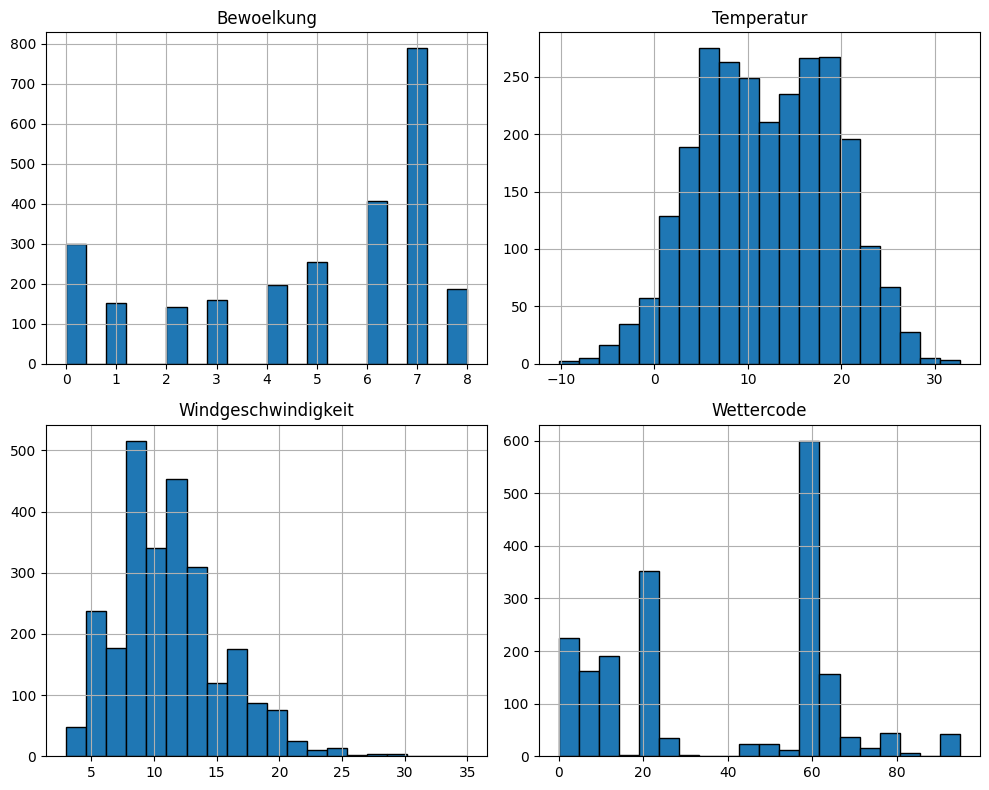

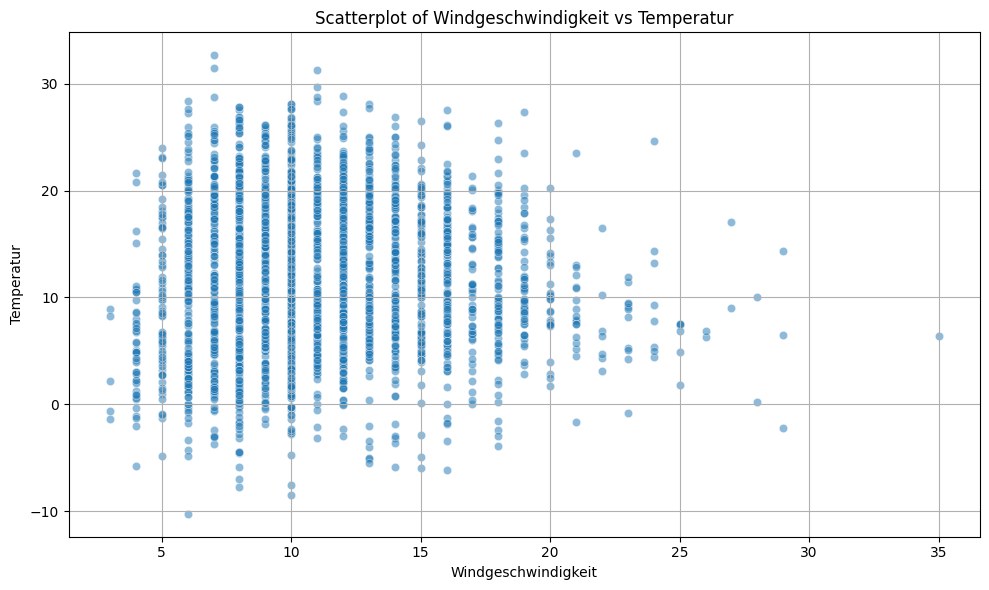

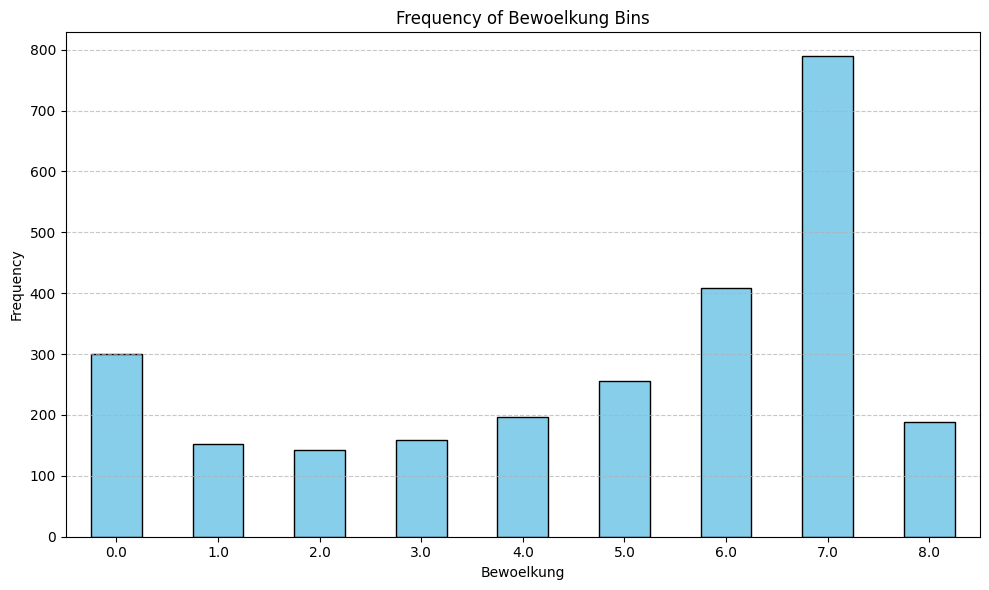

        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1


In [3]:
df_wetter = pd.read_csv('wetter.csv')
print(df_wetter.head())

df_wetter.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_wetter['Windgeschwindigkeit'], df_wetter['Temperatur'], alpha=0.5, edgecolors='w', linewidth=0.5)
plt.xlabel('Windgeschwindigkeit')
plt.ylabel('Temperatur')
plt.title('Scatterplot of Windgeschwindigkeit vs Temperatur')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the amount of Bewoelkung bins
bewoelkung_bins = df_wetter['Bewoelkung'].value_counts().sort_index()

# Plot as barplot
plt.figure(figsize=(10, 6))
bewoelkung_bins.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Bewoelkung')
plt.ylabel('Frequency')
plt.title('Frequency of Bewoelkung Bins')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

df_kiwo = pd.read_csv('kiwo.csv')
print(df_kiwo.head())

        Datum  Warengruppe      Umsatz        Day Produktgruppe
0  2013-07-01            1  148.828353     Monday          Brot
1  2013-07-02            1  159.793757    Tuesday          Brot
2  2013-07-03            1  111.885594  Wednesday          Brot
3  2013-07-04            1  168.864941   Thursday          Brot
4  2013-07-05            1  171.280754     Friday          Brot
           Datum       Umsatz
0     2013-07-01  1269.249107
1     2013-07-02  1430.008397
2     2013-07-03  1124.274894
3     2013-07-04  1184.309567
4     2013-07-05  1288.023060
...          ...          ...
1814  2018-07-27  1572.847053
1815  2018-07-28  1646.938417
1816  2018-07-29  1750.221545
1817  2018-07-30  1510.458573
1818  2018-07-31  1313.474071

[1819 rows x 2 columns]
           Datum       Umsatz     Day
0     2013-07-01  1269.249107  Monday
269   2014-03-31   992.736703  Monday
989   2016-04-04   789.280383  Monday
996   2016-04-11   762.106820  Monday
1003  2016-04-18   720.568493  Monday
...

/tmp/ipykernel_11573/3510336261.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = umsatz_per_day.groupby('Day')['Umsatz'].mean().reindex(day_order)
/tmp/ipykernel_11573/3510336261.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sem_values = umsatz_per_day.groupby('Day')['Umsatz'].sem().reindex(day_order)


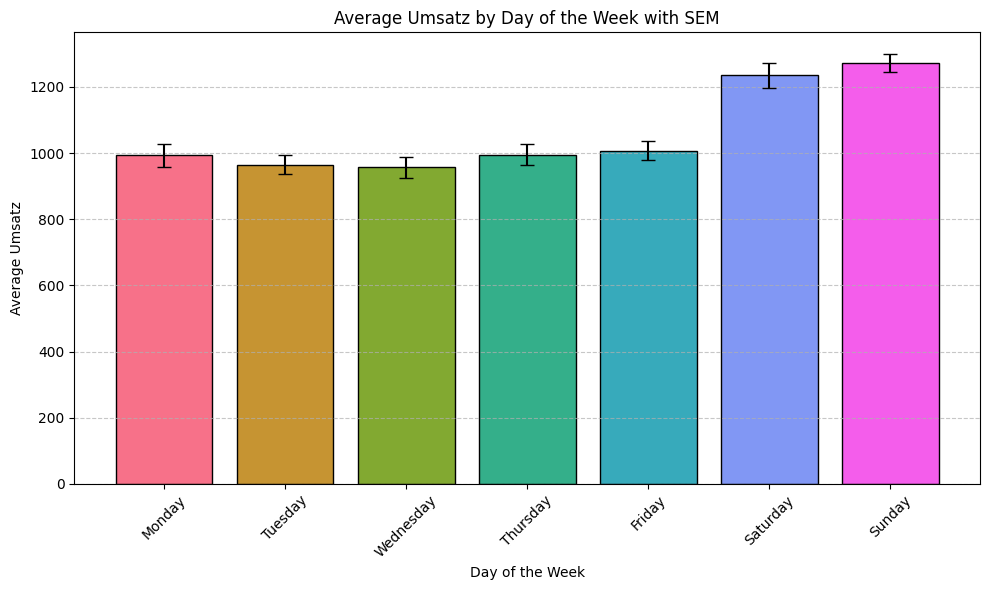

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


warengruppen_map = {
    1: "Brot",
    2: "Brötchen",
    3: "Croissant",
    4: "Konditorei",
    5: "Kuchen",
    6: "Saisonbrot",
}

df["Produktgruppe"] = df["Warengruppe"].map(warengruppen_map)

print(df.head())

umsatz_per_day = df.groupby('Datum')['Umsatz'].sum().reset_index()
print(umsatz_per_day)

umsatz_per_day['Day'] = pd.to_datetime(umsatz_per_day['Datum']).dt.strftime('%A')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
umsatz_per_day['Day'] = pd.Categorical(umsatz_per_day['Day'], categories=day_order, ordered=True)
umsatz_per_day = umsatz_per_day.sort_values('Day')
print(umsatz_per_day)

mean_values = umsatz_per_day.groupby('Day')['Umsatz'].mean().reindex(day_order)
sem_values = umsatz_per_day.groupby('Day')['Umsatz'].sem().reindex(day_order)

colors = sns.color_palette("husl", len(mean_values))

plt.figure(figsize=(10, 6))
plt.bar(mean_values.index, mean_values.values, yerr=1.96 * sem_values.values, capsize=5, color=colors, edgecolor='black')
plt.xlabel('Day of the Week')
plt.ylabel('Average Umsatz')
plt.title('Average Umsatz by Day of the Week with SEM')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()